In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

transform = transforms.Compose(
    [transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 50000

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

batch_size = 10000
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [38]:
dataiter = iter(trainloader)
img_train, lab_train = dataiter.next()
img_train = img_train / 2 + 0.5     # unnormalize
img_train = img_train.numpy()
lab_train = lab_train.numpy()

dataiter = iter(testloader)
img_test, lab_test = dataiter.next()
img_test = img_test / 2 + 0.5     # unnormalize
img_text = img_test.numpy()
lab_test = lab_test.numpy()
ac = []
mc = []    

x = np.arange(5,50,2)
for clusters in x:
    sift = cv.SIFT_create()
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    clf = RandomForestClassifier(max_depth=2, random_state=0)

    des_train = []
    des_predi = []

    for i, img in enumerate(img_train):
        img =  (img* 255).astype(np.uint8)
        img = np.transpose(img, (1,2,0))
        kp, des = sift.detectAndCompute(img,None)

        if str(type(des)) == "<class 'NoneType'>":
            des = np.zeros((1,128))

        des = np.float64(des)
        des_predi.append(des)
        des_train.extend(des)


    kmeans.fit(des_train)

    dici_train = []
    for i, pred in enumerate(des_predi):
        pr = kmeans.predict(pred)
        f, _ = np.histogram(pr, bins = clusters, density = True)
        dici_train.append(f)

    clf.fit(dici_train, lab_train)

    des_test = []
    des_predi = []
    for j, img in enumerate(img_text):
        img =  (img* 255).astype(np.uint8)
        img = np.transpose(img, (1,2,0))
        kp, des = sift.detectAndCompute(img,None)

        if str(type(des)) == "<class 'NoneType'>":
            des = np.zeros((1,128))

        des = np.float64(des)
        des_predi.append(des)
        des_test.extend(des)


    dici_test = []
    for j, pred in enumerate(des_predi):
        pr = kmeans.predict(pred)
        f, _ = np.histogram(pr, bins = clusters, density = True)
        dici_test.append(f)

    y_pred = clf.predict(dici_test)

    ac.append(accuracy_score(lab_test, y_pred)) 

    mc.append(confusion_matrix(lab_test, y_pred))

    print('Cluster ' + str(clusters))


Cluster 5
Cluster 7
Cluster 9
Cluster 11
Cluster 13
Cluster 15
Cluster 17
Cluster 19
Cluster 21
Cluster 23
Cluster 25
Cluster 27
Cluster 29
Cluster 31
Cluster 33
Cluster 35
Cluster 37
Cluster 39
Cluster 41
Cluster 43
Cluster 45
Cluster 47
Cluster 49


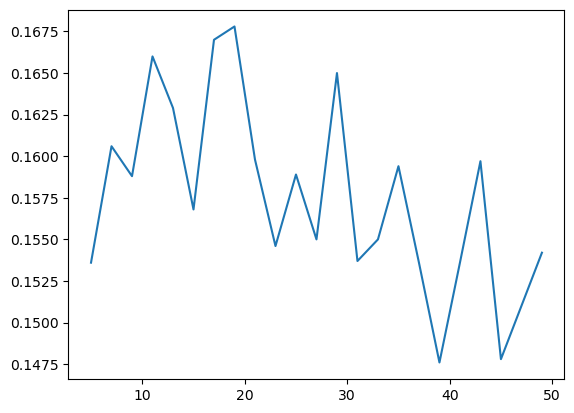

In [39]:
plt.figure()
plt.plot(x, ac)
plt.show()

In [1]:
x

NameError: name 'x' is not defined